# **Notebook to directly plot the prompts for better and faster Prototyping.**

In [1]:
from typing import List, Dict

In [2]:
import os
os.environ['GROQ_API_KEY'] = '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'

In [3]:
#Setting Groq client

from groq import Groq

GroqClient = Groq(
    api_key=os.environ.get("GROQ_API_KEY"),
)

In [4]:
#Exploring Groq API

chat_completion = GroqClient.chat.completions.create(
    messages=[
        {
            "role": "system",
            "content": "You are an History Teacher Specialized in U.S. American history" #. You always return your answer in JSON format."
        },
        {
            "role": "user",
            "content": "Who was the first U.S.A. President?",
        }
    ],
    model="llama3-70b-8192",
    #Temperature controls randomness: As the temperature approaches zero, the model will become deterministic and repetitive, Values from 0 to 2 - can be float.
    #If you adjust the temperature to 0.5, the model will generate text that is more predictable and less creative than if you set the temperature to 1.0.
    temperature=0.8,
    #Max output Tokens
    max_tokens=8192,
    #Top_P controls diversity via nucleus sampling: 0.5 means half of all likelihood-weighted options are considered, Values from 0 to 1 - can be float.
    #If you set top p to 0.9, the model will only consider the most likely words that make up 90% of the probability mass.
    top_p=1,
    seed=7688,
    stream=False,
    #stream=True,
    #response_format={"type": "json_object"},
    stop=None,
)

#If Stream set to True
#for chunk in chat_completion:
#    print(chunk.choices[0].delta.content or "", end="")

#If Stream set to False and response format not JSON
print(chat_completion.choices[0].message.content)

#If using JSON output, ensure Stream is set to False and System prompt contains the word JSON contextualized such as "You always return your answer in JSON format.".
#print(chat_completion.choices[0].message)

That's an easy one! The first President of the United States was George Washington. He was inaugurated on April 30, 1789, and served two terms in office until March 4, 1797.

Washington was a military leader during the American Revolutionary War and is considered one of the founding fathers of the United States. He played a key role in the drafting and ratification of the United States Constitution, and his leadership and integrity earned him the respect and admiration of the American people.

In fact, he's the only president in U.S. history to be unanimously elected by the Electoral College, receiving all 69 electoral votes in the first presidential election in 1789. He's also the only president to have served two terms without facing opposition, as he was re-elected in 1792 with no opposing candidates.

Washington's legacy has endured for centuries, and he remains one of the most revered figures in American history. He's often referred to as the "Father of the Country," and his image

In [5]:
def GetAnswerGroqLlama70b(Chat: List[Dict[str, str]], Llama: str, Temperature: float, MaxTokens: int, TopP: float, Seed: int, Stream: bool) -> str:

    LlamaChat = GroqClient.chat.completions.create(
    messages = Chat,
    model = Llama,
    temperature = Temperature,
    max_tokens = MaxTokens,
    top_p = TopP,
    seed = Seed,
    stream = Stream,
    stop = None
)
    return LlamaChat.choices[0].message.content

In [6]:
#Testing the Function

messages=[
    {
        "role": "system",
        "content": "You are an History Teacher Specialized in U.S. American history" #. You always return your answer in JSON format."
    },
    {
        "role": "user",
        "content": "Who was the first U.S.A. President?",
    }
    ]

model="llama3-70b-8192"
temperature=0.8
max_tokens=8192
top_p=1
seed=7688
stream=False

TestLlamaFunc = GetAnswerGroqLlama70b(messages, model, temperature, max_tokens, top_p, seed, stream)

print(TestLlamaFunc)

That's an easy one! The first President of the United States of America was George Washington. He was inaugurated on April 30, 1789, and served two terms in office until March 4, 1797.

Washington was a military leader during the American Revolutionary War and is considered one of the founding fathers of the United States. He played a key role in the drafting and ratification of the United States Constitution and is widely regarded as one of the most important figures in American history.

In fact, he's often referred to as the "Father of the Country" due to his leadership and influence in shaping the early years of the United States. Washington set many important precedents for the office of the presidency, including the decision to serve only two terms and the establishment of a cabinet system. He's also the only president in U.S. history to be unanimously elected by the Electoral College!


# **Implementation**

In [7]:
#Importing Libraries

#Data Wrangling
import pandas as pd
import numpy as np

#Date and Time Manipulation
from datetime import datetime
from datetime import timedelta

#JSON handling
import json

#Plotting
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mpl_dates
from matplotlib.patches import Rectangle

/home/nomad/Desktop/PlsHireMe/PHMvenv/lib/python3.11/site-packages/mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


In [8]:
btcdata = pd.read_csv("btcusdlast100.csv")

btcdata.drop(["Adj Close"], axis=1, inplace=True)
btcdata.head()

,Date,Open,High,Low,Close,Volume
0,2024-03-11,69020.546875,72850.710938,67194.882813,72123.906250,65716656765
1,2024-03-12,72125.125000,72825.656250,68728.851563,71481.289063,62554434520
2,2024-03-13,71482.117188,73637.476563,71334.093750,73083.500000,48212536929
3,2024-03-14,73079.375000,73750.070313,68563.023438,71396.593750,59594605698
4,2024-03-15,71387.875000,72357.132813,65630.695313,69403.773438,78320453976


In [9]:
# Since we are going to work with data from only 2024, we are going to format that Data by Dropping the year

btcdata["Date"] = btcdata["Date"].apply(lambda x: x[5:])

btcdata.head()

,Date,Open,High,Low,Close,Volume
0,03-11,69020.546875,72850.710938,67194.882813,72123.906250,65716656765
1,03-12,72125.125000,72825.656250,68728.851563,71481.289063,62554434520
2,03-13,71482.117188,73637.476563,71334.093750,73083.500000,48212536929
3,03-14,73079.375000,73750.070313,68563.023438,71396.593750,59594605698
4,03-15,71387.875000,72357.132813,65630.695313,69403.773438,78320453976


In [10]:
#Converting to Numpy for Faster Calc

btcdatanp = btcdata.to_numpy() 
btcdatanp.shape

(100, 6)

In [11]:
#HL ZigZag
#Calculating ZigZag

zigzag = []
threshold = 2  # 10% threshold

#Appending First - Date and OpeningPrice
zigzag.append([btcdatanp[0][0], btcdatanp[0][1]])

StartPoint = zigzag[0][1]

for x in range(1, len(btcdatanp)):

    High = btcdatanp[x][2]
    Low = btcdatanp[x][3]

    pchangehigh = ((High - StartPoint) / StartPoint) * 100
    pchangelow = ((Low - StartPoint) / StartPoint) * 100

    #print(pchangehigh, pchangelow)

    best = 0

    if abs(pchangehigh) > abs(pchangelow):
        best = pchangehigh
        level = High
    
    else:
        best = pchangelow
        level = Low

    #print(best, level)

    if len(zigzag) >= 2:   
        if (zigzag[-1][-1] - zigzag[-2][-1]) > 0 and High > zigzag[-1][-1]:
            zigzag.pop()
            zigzag.append([btcdatanp[x][0], High])
            StartPoint = High
            continue
                
        elif (zigzag[-1][-1] - zigzag[-2][-1]) < 0 and Low < zigzag[-1][-1]:
            zigzag.pop()
            zigzag.append([btcdatanp[x][0], Low])
            StartPoint = Low
            continue
    
    if abs(best) >= threshold:
        zigzag.append([btcdatanp[x][0], level])
        StartPoint = level 

zzdf = pd.DataFrame(zigzag, columns = ["Date", "ZZ"])
zzdf.head()

,Date,ZZ
0,03-11,69020.546875
1,03-14,73750.070313
2,03-17,64545.316406
3,03-18,68897.132813
4,03-20,60807.785156


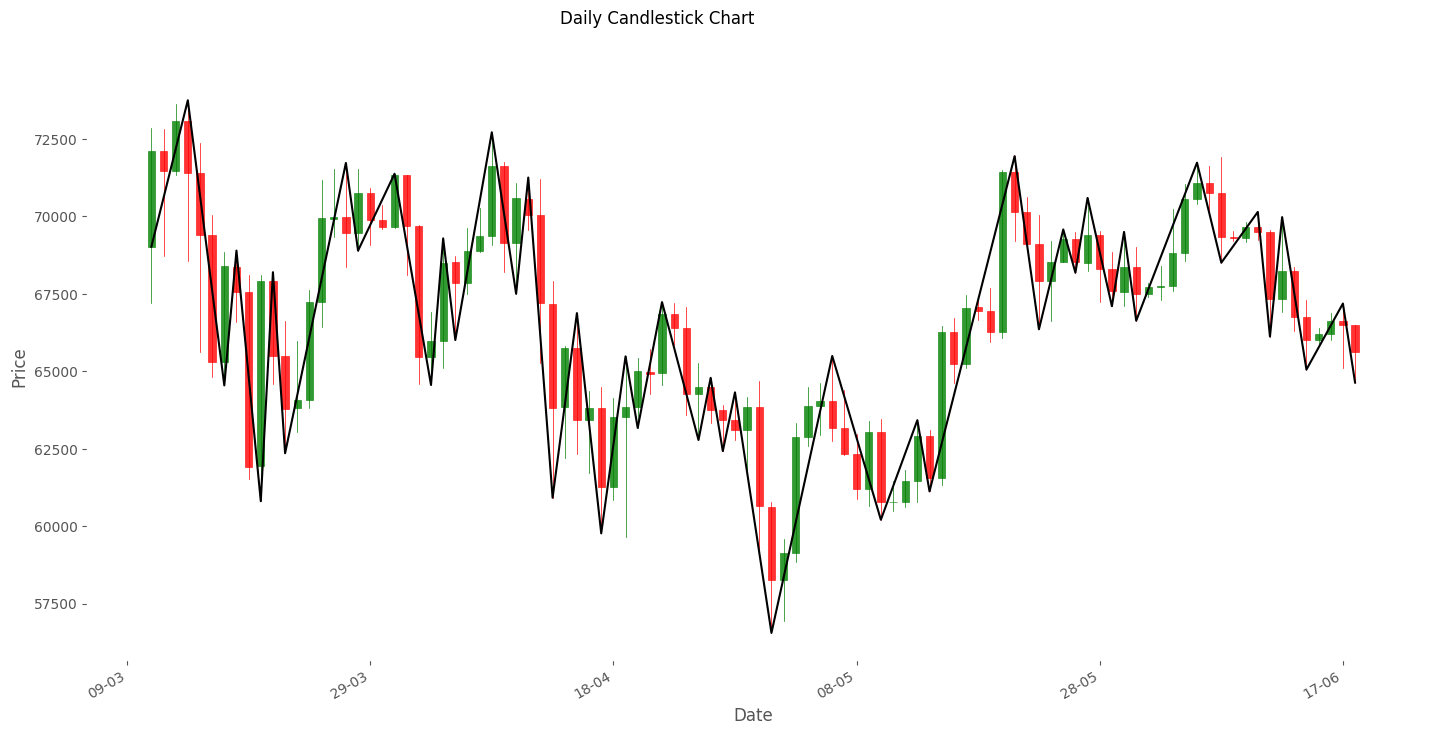

In [12]:
#Plotting HighLow ZigZag

#Plotting ZigZag on top of Candlesticks Chart

plt.style.use('ggplot')

# Extracting Data for plotting
ohlc = btcdata.loc[:, ['Date', 'Open', 'High', 'Low', 'Close']]
ohlc['Date'] = pd.to_datetime(ohlc['Date'], format="%m-%d")
ohlc['Date'] = ohlc['Date'].apply(mpl_dates.date2num)
ohlc = ohlc.astype(float)

zigzagplot = zzdf.copy()
zigzagplot['Date'] = pd.to_datetime(zigzagplot['Date'], format="%m-%d")
zigzagplot['Date'] = zigzagplot['Date'].apply(mpl_dates.date2num)
zigzagplot = zigzagplot.astype(float)

# Creating Subplots
fig, ax = plt.subplots()

candlestick_ohlc(ax, ohlc.values, width=0.6, colorup='green', colordown='red', alpha=0.8)

ax.plot(zigzagplot["Date"], zigzagplot["ZZ"], color="black")

# Setting labels & titles
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_facecolor('white')
fig.suptitle('Daily Candlestick Chart')

# Formatting Date
date_format = mpl_dates.DateFormatter('%d-%m')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()

fig.tight_layout()
fig.set_size_inches(16,8)

plt.show()

#plt.savefig("chartlast100candleswzigzag.png")

In [13]:
#Calculating TrueRange

TR = [[x[0], abs(x[2] - x[3])] for x in btcdatanp]
trdf = pd.DataFrame(TR, columns = ["Date", "TR"])

In [14]:
#Converting TR DF to text

TextTR = "\n".join([f'{row[0]}, {round(row[1],2)}' for i, row in enumerate(trdf.itertuples(index=False))])
#print(TextTR)

In [15]:
#OpenClose Only
ocdf = btcdata[["Date"]].copy()
ocdf["BodySize"] = round(btcdata["Close"] - btcdata["Open"], 2)
ocdf

,Date,BodySize
0,03-11,3103.36
1,03-12,-643.84
2,03-13,1601.38
3,03-14,-1682.78
4,03-15,-1984.10
...,...,...
95,06-14,-736.48
96,06-15,184.26
97,06-16,449.69
98,06-17,-146.22


In [16]:
TextOC = "\n".join([f'{row[0]}, {row[1]}' for i, row in enumerate(ocdf.itertuples(index=False))])
print(TextOC)

03-11, 3103.36
03-12, -643.84
03-13, 1601.38
03-14, -1682.78
03-15, -1984.1
03-16, -4077.37
03-17, 3074.28
03-18, -822.71
03-19, -5643.36
03-20, 5983.52
03-21, -2420.2
03-22, -1711.17
03-23, 259.48
03-24, 3163.42
03-25, 2724.72
03-26, 56.51
03-27, -536.55
03-28, 1292.18
03-29, -851.97
03-30, -248.14
03-31, 1685.87
04-01, -1631.34
04-02, -4258.05
04-03, 534.14
04-04, 2533.15
04-05, -678.12
04-06, 1055.54
04-07, 465.45
04-08, 2268.8
04-09, -2493.48
04-10, 1447.64
04-11, -515.12
04-12, -2865.52
04-13, -3366.9
04-14, 1902.5
04-15, -2313.44
04-16, 392.57
04-17, -2555.16
04-18, 2237.44
04-19, 332.82
04-20, 1143.34
04-21, -66.17
04-22, 1902.05
04-23, -432.62
04-24, -2131.82
04-25, 206.69
04-26, -730.05
04-27, -331.85
04-28, -310.29
04-29, 734.76
04-30, -3202.56
05-01, -2355.48
05-02, 869.73
05-03, 3767.54
05-04, 1000.44
05-05, 138.68
05-06, -876.36
05-07, -827.95
05-08, -1144.7
05-09, 1858.76
05-10, -2262.41
05-11, 0.36
05-12, 654.89
05-13, 1450.23
05-14, -1347.98
05-15, 4713.5
05-16, -1024.5

# **Second Prompt**

In [17]:
prompt = \
'''
To achieve this goal, the first step is to divide the Final Goal of returning a Technical Summary to the user into smaller standalone task, and then to merge them together. 
That being said, return what are the 5 things you would look out for in a Candlesticks chart, considering that every task will then be merged on a complete technical summary.
Specifically, you need to generate a list of technical indicators that you'll later use to build a complete summary
For every section of the narrow scoped technical analysis point, also provide what data would be useful to achieve the desired analisys goal.
The expected final goal will be an overview rather than a technical analysis. 
The returned answer should be in a bullet list format, where every point starts with a "-" sign and there is a "\n" dividing each point of the bullet list. 
Return only the Bullet list without adding anything before and after it.
'''

Test = '''
The first step is to divide the Final Goal of returning a Technical Summary to the user into smaller standalone task with narrow specific analisys, and then to merge them together. 
That being said, return what are the main technical things you would look out for in a Candlesticks chart, considering that every task will then be merged on a complete technical summary.
Specifically, you need to generate a list of technical indicators by breaking down the process of analyzing a chart, that you'll later use to build a complete summary.
For every section of the narrow scoped technical analysis point, also provide what data would be useful to achieve the desired analisys goal.
The returned answer should be in a bullet list format, where every point starts with a "-" sign and there is a "\n" dividing each point of the bullet list. 
Return only the Bullet list without adding anything before and after it.
'''

Testerino = '''
Say I would like to identify trading ranges, in the form of consolidation or congestion zones.
What technical indicator would help me the most and how should i use it?
'''


messages=[
    {
        "role": "system",
        "content": "You are a Financial Markets Trader and Analyst, your job is to look at price action fluctuations, and after you've elaborated them, to return a technical summary of what happened throughout the trading day."
    },
    {
        "role": "user",
        "content": Testerino,
    }
    ]

model="llama3-70b-8192"
temperature=0.8
max_tokens=8192
top_p=1
seed=7688
stream=False

TestLlamaFunc = GetAnswerGroqLlama70b(messages, model, temperature, max_tokens, top_p, seed, stream)

print(TestLlamaFunc)

Identifying trading ranges, also known as consolidation or congestion zones, is a crucial aspect of technical analysis. One of the most effective technical indicators for this purpose is the Bollinger Bands.

Bollinger Bands, developed by John Bollinger, consist of three lines:

1. A moving average (usually a 20-period simple moving average)
2. An upper band (2 standard deviations above the moving average)
3. A lower band (2 standard deviations below the moving average)

To use Bollinger Bands for identifying trading ranges, follow these steps:

1. **Apply the Bollinger Bands to your chart**: Set the moving average period to 20 (or a period that suits your trading strategy) and the standard deviation to 2.
2. **Look for contraction**: When the Bollinger Bands contract, it indicates a decrease in volatility. This can be a sign of a trading range or consolidation zone forming.
3. **Identify the range**: Measure the distance between the upper and lower bands. When the bands are narrow, it

In [18]:
SystemPrompt = \
'''
You are a Financial Markets Trader and Analyst, and your job is to look at and interpret price action fluctuations.
Then, after you've digested and analysed them, you will return an elaborated technical summary of what happened throughout the trading day based on the user request.
More specifically, your task is, given a simple narrow request and some contextual data, to generate a neutral technical analysis summary based on the request made by the user, without giving any suggestions or investment advice to potential traders and investors.
'''

In [19]:
SecondQuery = \
'''
Look for all areas of congestion or consolidation, where the Total Excursion from High to Low is similar and around the previous' day High and Low, which can indicate a potential breakout or reversal, or simply a trading a range.
More precisely, a Congestion or Consolidation area is defined as an area where Highs and Lows Prices are similar to the previous' ones for some consecutive days and the price seems to be stagnating horizontally.
Return only Consolidations or congestions that has seen a duration of at least 4 days, where consolidations and congestions are characterized by consecutive compressed Total Excursion, that are below the average.
The identified consolidation or congestion areas should not be too precise, instead, they need to indicate an area.
You should also point out the date when the consolidation or congestion started as well as how much time the price has spent in that Area.
'''

In [20]:
TextHL = "\n".join([f'{row[0]}, {int(row[2])}, {int(row[3])}' for i, row in enumerate(btcdata.itertuples(index=False))])
print(TextHL)

03-11, 72850, 67194
03-12, 72825, 68728
03-13, 73637, 71334
03-14, 73750, 68563
03-15, 72357, 65630
03-16, 70046, 64801
03-17, 68845, 64545
03-18, 68897, 66594
03-19, 68106, 61536
03-20, 68115, 60807
03-21, 68199, 64580
03-22, 66623, 62355
03-23, 65976, 63038
03-24, 67622, 63825
03-25, 71162, 66414
03-26, 71535, 69335
03-27, 71727, 68381
03-28, 71546, 68895
03-29, 70913, 69076
03-30, 70355, 69601
03-31, 71377, 69624
04-01, 71342, 68110
04-02, 69708, 64586
04-03, 66914, 64559
04-04, 69291, 65113
04-05, 68725, 66011
04-06, 69629, 67491
04-07, 70284, 68851
04-08, 72715, 69064
04-09, 71742, 68212
04-10, 71093, 67503
04-11, 71256, 69571
04-12, 71222, 65254
04-13, 67931, 60919
04-14, 65824, 62205
04-15, 66878, 62332
04-16, 64355, 61716
04-17, 64486, 59768
04-18, 64125, 60833
04-19, 65481, 59651
04-20, 65442, 63172
04-21, 65723, 64277
04-22, 67233, 64548
04-23, 67199, 65864
04-24, 67075, 63589
04-25, 65275, 62783
04-26, 64789, 63322
04-27, 63898, 62424
04-28, 64321, 62793
04-29, 64174, 61795


In [21]:
SecondPromptTemplate = \
'''
I want you to:

{QUESTION}

The Dataset you'll be given will be in this format:

Date, High, Low

Where, Date is the date, formatted as month-day of the session, High is the high price for that given session, and Low is the Low price for that given session.
The Dataset given will not contain any candlesticks, and the expected final goal will be an overview rather than a technical analysis.

Here's the Dataset:

Date, High, Low

{DATASET}

Return the answer and the answer only, without adding anything before and after it.
'''

In [22]:
SecondPromptComplete = SecondPromptTemplate.replace("{QUESTION}", SecondQuery).replace("{DATASET}", TextHL)
print(SecondPromptComplete)



I want you to:


Look for all areas of congestion or consolidation, where the Total Excursion from High to Low is similar and around the previous' day High and Low, which can indicate a potential breakout or reversal, or simply a trading a range.
More precisely, a Congestion or Consolidation area is defined as an area where Highs and Lows Prices are similar to the previous' ones for some consecutive days and the price seems to be stagnating horizontally.
Return only Consolidations or congestions that has seen a duration of at least 4 days, where consolidations and congestions are characterized by consecutive compressed Total Excursion, that are below the average.
The identified consolidation or congestion areas should not be too precise, instead, they need to indicate an area.
You should also point out the date when the consolidation or congestion started as well as how much time the price has spent in that Area.


The Dataset you'll be given will be in this format:

Date, High, Low



In [23]:
messages = [
            {
                "role": "system",
                "content": SystemPrompt
            },
            {
                "role": "user",
                "content": SecondPromptComplete
            }
            ]

model="llama3-70b-8192"
temperature=0.8
max_tokens=8192
top_p=1
seed=7688
stream=False

SecondAnswer = GetAnswerGroqLlama70b(messages, model, temperature, max_tokens, top_p, seed, stream)

In [24]:
print(SecondAnswer)

Here are the identified consolidation or congestion areas:

* 03-13 to 03-17: The price spent 5 days in the consolidation area between 68845 and 72357.
* 03-24 to 03-29: The price spent 6 days in the consolidation area between 66414 and 71162.
* 04-07 to 04-11: The price spent 5 days in the consolidation area between 67491 and 71256.
* 05-10 to 05-14: The price spent 5 days in the consolidation area between 60208 and 63422.
* 05-24 to 05-28: The price spent 5 days in the consolidation area between 66356 and 69220.
* 05-31 to 06-04: The price spent 5 days in the consolidation area between 66633 and 69500.
* 06-09 to 06-12: The price spent 4 days in the consolidation area between 69160 and 70146.


In [25]:
FormatTemplate = \
'''
Now reformulate the previous answer in a "Dataset" format, as follows:

Area Start Date, Area Time Duration

Where Area Time Duration must be expressed in days.

Return the Dataset only as JSON Format.
'''

def Formatting(Chat: List[Dict[str, str]], Llama: str, Temperature: float, MaxTokens: int, TopP: float, Seed: int, Stream: bool) -> str:

    LlamaChat = GroqClient.chat.completions.create(
    messages = Chat,
    model = Llama,
    temperature = Temperature,
    max_tokens = MaxTokens,
    top_p = TopP,
    seed = Seed,
    stream = False,
    response_format={"type": "json_object"},    
    stop = None
)
    return LlamaChat.choices[0].message

messages = [
            {
                "role": "system",
                "content": SystemPrompt
            },
            {
                "role": "user",
                "content": SecondPromptComplete
            },
            {
                "role": "user",
                "content": SecondAnswer
            },
            {
                "role": "user",
                "content": FormatTemplate
            }
            ]

SecondFormat = GetAnswerGroqLlama70b(messages, model, temperature, max_tokens, top_p, seed, stream)

In [26]:
SecondDict = json.loads(SecondFormat)

SecondDict

[{'Area Start Date': '03-13', 'Area Time Duration': 5},
 {'Area Start Date': '03-24', 'Area Time Duration': 6},
 {'Area Start Date': '04-07', 'Area Time Duration': 5},
 {'Area Start Date': '05-10', 'Area Time Duration': 5},
 {'Area Start Date': '05-24', 'Area Time Duration': 5},
 {'Area Start Date': '05-31', 'Area Time Duration': 5},
 {'Area Start Date': '06-09', 'Area Time Duration': 4}]

In [27]:
#So far, keeping Area Start Date formatted as str

SecondFormatted = []

for x in range(1, len(SecondDict)):
    PrevStartDate = pd.to_datetime(SecondDict[x-1]["Area Start Date"], format = "%m-%d")
    PrevTimeSpent = int(SecondDict[x-1]["Area Time Duration"])
    CurrStartDate = pd.to_datetime(SecondDict[x]["Area Start Date"], format = "%m-%d")
    CurrTimeSpent = int(SecondDict[x]["Area Time Duration"])
    
    if (PrevStartDate + timedelta(days = PrevTimeSpent)) >= CurrStartDate:
        if len(SecondFormatted) > 0:
            SecondFormatted[-1]["Area Time Duration"] = SecondFormatted[-1]["Area Time Duration"] + CurrTimeSpent 
    
        else:
            SecondFormatted.append({"Area Start Date": SecondDict[x-1]["Area Start Date"], "Area Time Duration": PrevTimeSpent + CurrTimeSpent})
    
    else:
        if len(SecondFormatted) == 0:
            SecondFormatted.append({"Area Start Date": SecondDict[x-1]["Area Start Date"], "Area Time Duration": int(SecondDict[x-1]["Area Time Duration"])})
        SecondFormatted.append({"Area Start Date": SecondDict[x]["Area Start Date"], "Area Time Duration": int(SecondDict[x]["Area Time Duration"])})

In [28]:
SecondFormatted

[{'Area Start Date': '03-13', 'Area Time Duration': 5},
 {'Area Start Date': '03-24', 'Area Time Duration': 6},
 {'Area Start Date': '04-07', 'Area Time Duration': 5},
 {'Area Start Date': '05-10', 'Area Time Duration': 5},
 {'Area Start Date': '05-24', 'Area Time Duration': 5},
 {'Area Start Date': '05-31', 'Area Time Duration': 5},
 {'Area Start Date': '06-09', 'Area Time Duration': 4}]

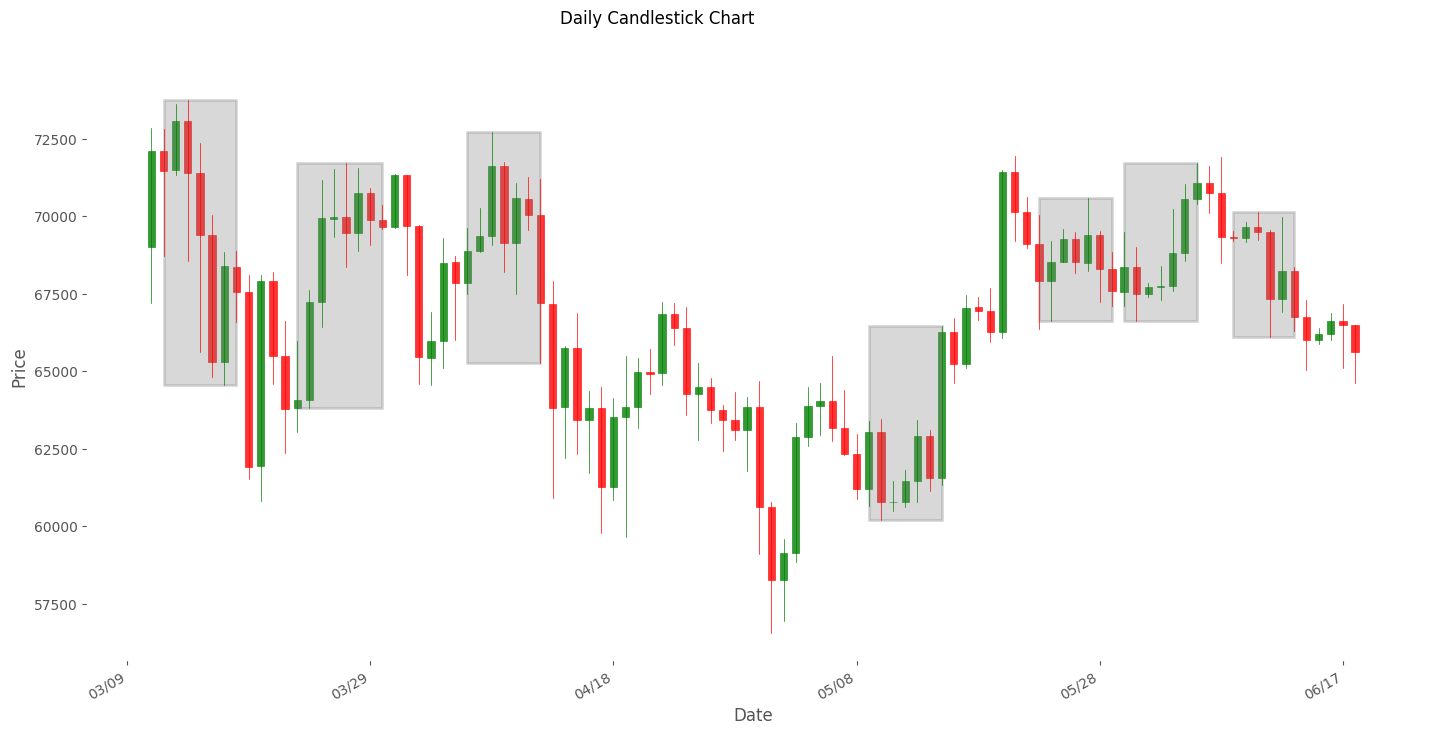

In [29]:
#PlottingAnswer

plt.style.use('ggplot')

CongCons = SecondFormatted.copy()
btc = btcdata.copy()

# Extracting Data for plotting
ohlc = btc.loc[:, ['Date', 'Open', 'High', 'Low', 'Close']]
ohlc['Date'] = pd.to_datetime(ohlc['Date'], format = "%m-%d")
ohlc['Date'] = ohlc['Date'].apply(mpl_dates.date2num)
ohlc = ohlc.astype(float)

zigzagplot = zzdf.copy()
zigzagplot['Date'] = pd.to_datetime(zigzagplot['Date'], format = "%m-%d")
zigzagplot['Date'] = zigzagplot['Date'].apply(mpl_dates.date2num)
zigzagplot = zigzagplot.astype(float)

# Creating Subplots
fig, ax = plt.subplots()

candlestick_ohlc(ax, ohlc.values, width=0.6, colorup='green', colordown='red', alpha=0.8)

#ax.plot(zigzagplot["Date"], zigzagplot["ZZ"], color="black")

# Setting labels & titles
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_facecolor('white')
fig.suptitle('Daily Candlestick Chart')

# Formatting Date
date_format = mpl_dates.DateFormatter('%m/%d')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()

fig.tight_layout()
fig.set_size_inches(16,8)

#Adding levels and areas to Plot

for x in CongCons:

    AreaColor = "Gray"
    
    AreaStartDate = pd.to_datetime(x["Area Start Date"], format = "%m-%d")
    AreaDaysSpent = int(x["Area Time Duration"])
    AreaEndDate = pd.to_datetime(x["Area Start Date"], format = "%m-%d") + timedelta(days = AreaDaysSpent)

    PricesRange = btc[(pd.to_datetime(btc["Date"], format = "%m-%d") >= AreaStartDate) & (pd.to_datetime(btc["Date"], format = "%m-%d") <= AreaEndDate)]

    UpperBound = max(PricesRange["High"])
    LowerBound = min(PricesRange["Low"])
    BoundDiff = UpperBound - LowerBound

    ax.add_patch(Rectangle((AreaStartDate - timedelta(days = 1), LowerBound), timedelta(days = AreaDaysSpent +1), BoundDiff,
             edgecolor = AreaColor,
             facecolor = AreaColor,
             fill = True,
             lw = 2,
             alpha = 0.3))

### Results Obtained Right now are quite Horrible, but we'll manage to play with them later with the PlayGround.

---

# Testing out a Chain of Thought Process.

In [30]:

TestSystemPromptCoT = \
'''
You are a Financial Markets Trader and Analyst, and your job is to look at and interpret price action fluctuations.
You are highly Specialized into finding Trading Ranges, in the form of Congestion and Consolidation Areas, where Highs and Lows cluster around the same value for consecutive sessions.
You are also Specialized into breaking down the whole process of finding those zones and merging the reasoning of the intermediate steps into a final answer.
Speficially, your job is to break the complex task of finding Congestion and Consolidation zones into smaller steps, then, after you've digested and analysed them, you will return an elaborated technical summary of the Trading Ranges you have identified throughout the day.
'''

SecondIntroductionChain = \
'''
For this Iterative process, you'll be given along the way different Datasets.
The first Dataset you'll be given will be in this format:

Date, High, Low

Where, Date is the date, formatted as month-day of the session, High is the high price for that given session, and Low is the Low price for that given session.
The Dataset given will not contain any candlesticks, and the expected final goal will be an overview rather than a technical analysis.

Here's the Dataset:

Date, High, Low

{DATASET}
'''

SecondFirstChain = \
'''
Now, Breaking Down the complex Task of finding Trading Ranges, the First Step is:

{STEP}

Return the answer and the answer only, without adding anything before and after it.
'''

FirstStep = \
'''
Look for Zones where the Total Excursion from High to Low is similar and around the previous' day High and Low, which indicate a trading a range.
More precisely, a Congestion or Consolidation area is defined as an area where Highs and Lows Prices are similar to the previous' ones for some consecutive days and the price seems to be stagnating horizontally.
Return only Consolidations or congestions that has seen a duration of at least 4 days, where consolidations and congestions are characterized by consecutive compressed Total Excursion, that are below the average.
The identified consolidation or congestion areas should not be too precise, instead, they need to indicate an area.
You should also point out the date when the consolidation or congestion started as well as how much time the price has spent in that Area.
'''

In [31]:
SecondChainIntroComplete = SecondIntroductionChain.replace("{DATASET}", TextHL)
FirstChainComplete = SecondIntroductionChain.replace("{STEP}", FirstStep)

In [32]:
messages = [
            {
                "role": "system",
                "content": TestSystemPromptCoT
            },
            {
                "role": "user",
                "content": SecondChainIntroComplete
            },
            {
                "role": "user",
                "content": FirstChainComplete
            }
            ]

model="llama3-70b-8192"
temperature=0.8
max_tokens=8192
top_p=1
seed=7688
stream=False

CoTFirstChain = GetAnswerGroqLlama70b(messages, model, temperature, max_tokens, top_p, seed, stream)

print(CoTFirstChain)

Let's start the iterative process. 

After analyzing the provided dataset, I have identified several Congestion and Consolidation zones, which are areas of trading ranges where Highs and Lows cluster around the same value for consecutive sessions.

Here's a summary of the identified zones:

**Zone 1:** 03-11 to 03-17
High: 72850 - 73637
Low: 67194 - 64545
This zone indicates a period of consolidation, where the price action is contained within a range, with no clear direction.

**Zone 2:** 03-24 to 04-05
High: 67622 - 71535
Low: 63038 - 64586
This zone shows a congestion area, where the price is stuck between the 66000 and 69000 levels.

**Zone 3:** 04-11 to 04-22
High: 71256 - 72715
Low: 65254 - 68212
This zone indicates another period of consolidation, with the price action oscillating between the 69000 and 71000 levels.

**Zone 4:** 05-01 to 05-15
High: 60780 - 64610
Low: 56555 - 62783
This zone shows a clear downtrend, with the price action decreasing and forming a series of lower 

In [33]:
#Testing First Chain

FirstChainFormatTemplate = \
'''
Now reformulate the previous answer in a "Dataset" format, as follows:

Area Start Date, Area Time Duration

Where Area Time Duration must be expressed in days.

Return the Dataset only as JSON Format, and do not add anything before and after it.
'''

messages = [
            {
                "role": "system",
                "content": TestSystemPromptCoT
            },
            {
                "role": "user",
                "content": SecondChainIntroComplete
            },
            {
                "role": "user",
                "content": FirstChainComplete
            },
            {
                "role": "assistant",
                "content": CoTFirstChain
            },
            {
                "role": "user",
                "content": FirstChainFormatTemplate
            }
            ]

SecondFormat = GetAnswerGroqLlama70b(messages, model, temperature, max_tokens, top_p, 0, stream)
SecondDict = json.loads(SecondFormat)

SecondDict
print(SecondDict)

[{'Area Start Date': '03-11', 'Area Time Duration': 7}, {'Area Start Date': '03-24', 'Area Time Duration': 12}, {'Area Start Date': '04-11', 'Area Time Duration': 11}, {'Area Start Date': '05-01', 'Area Time Duration': 15}, {'Area Start Date': '05-16', 'Area Time Duration': 15}, {'Area Start Date': '06-01', 'Area Time Duration': 12}]


In [34]:
SecondFormatted = []

for x in range(1, len(SecondDict)):
    PrevStartDate = pd.to_datetime(SecondDict[x-1]["Area Start Date"], format = "%m-%d")
    PrevTimeSpent = int(SecondDict[x-1]["Area Time Duration"])
    CurrStartDate = pd.to_datetime(SecondDict[x]["Area Start Date"], format = "%m-%d")
    CurrTimeSpent = int(SecondDict[x]["Area Time Duration"])
    
    if (PrevStartDate + timedelta(days = PrevTimeSpent)) >= CurrStartDate:
        if len(SecondFormatted) > 0:
            SecondFormatted[-1]["Area Time Duration"] = SecondFormatted[-1]["Area Time Duration"] + CurrTimeSpent 
    
        else:
            SecondFormatted.append({"Area Start Date": SecondDict[x-1]["Area Start Date"], "Area Time Duration": PrevTimeSpent + CurrTimeSpent})
    
    else:
        if len(SecondFormatted) == 0:
            SecondFormatted.append({"Area Start Date": SecondDict[x-1]["Area Start Date"], "Area Time Duration": int(SecondDict[x-1]["Area Time Duration"])})
        SecondFormatted.append({"Area Start Date": SecondDict[x]["Area Start Date"], "Area Time Duration": int(SecondDict[x]["Area Time Duration"])})

In [35]:
SuppRes = pd.read_csv("suppres.csv")
SuppRes

,Area Type,Area Level,Bounces,Area Range
0,Support Level,60000.0,5,NaN
1,Support Level,62000.0,4,NaN
2,Support Level,65000.0,6,NaN
3,Resistance Area,NaN,11,68000-69000
4,Resistance Area,NaN,9,71000-72000


In [36]:
SuppRes.values

array([['Support Level', 60000.0, 5, nan],
       ['Support Level', 62000.0, 4, nan],
       ['Support Level', 65000.0, 6, nan],
       ['Resistance Area', nan, 11, '68000-69000'],
       ['Resistance Area', nan, 9, '71000-72000']], dtype=object)

In [37]:
from math import isnan as nan
SuppResDict = []

for x in SuppRes.values:
    if "Level" in x[0]:
        SuppResDict.append({
            "Area Type" : x[0],
            "Area Level" : int(x[1]),
            "Bounces" : x[2]
        })
        
    elif "Area" in x[0]:
        SuppResDict.append({
            "Area Type" : x[0],
            "Area Range" : x[-1],
            "Bounces" : x[2]
        })  

    else:
        continue


#nan(SuppRes.values[0][-1])
SuppResDict

[{'Area Type': 'Support Level', 'Area Level': 60000, 'Bounces': 5},
 {'Area Type': 'Support Level', 'Area Level': 62000, 'Bounces': 4},
 {'Area Type': 'Support Level', 'Area Level': 65000, 'Bounces': 6},
 {'Area Type': 'Resistance Area', 'Area Range': '68000-69000', 'Bounces': 11},
 {'Area Type': 'Resistance Area', 'Area Range': '71000-72000', 'Bounces': 9}]

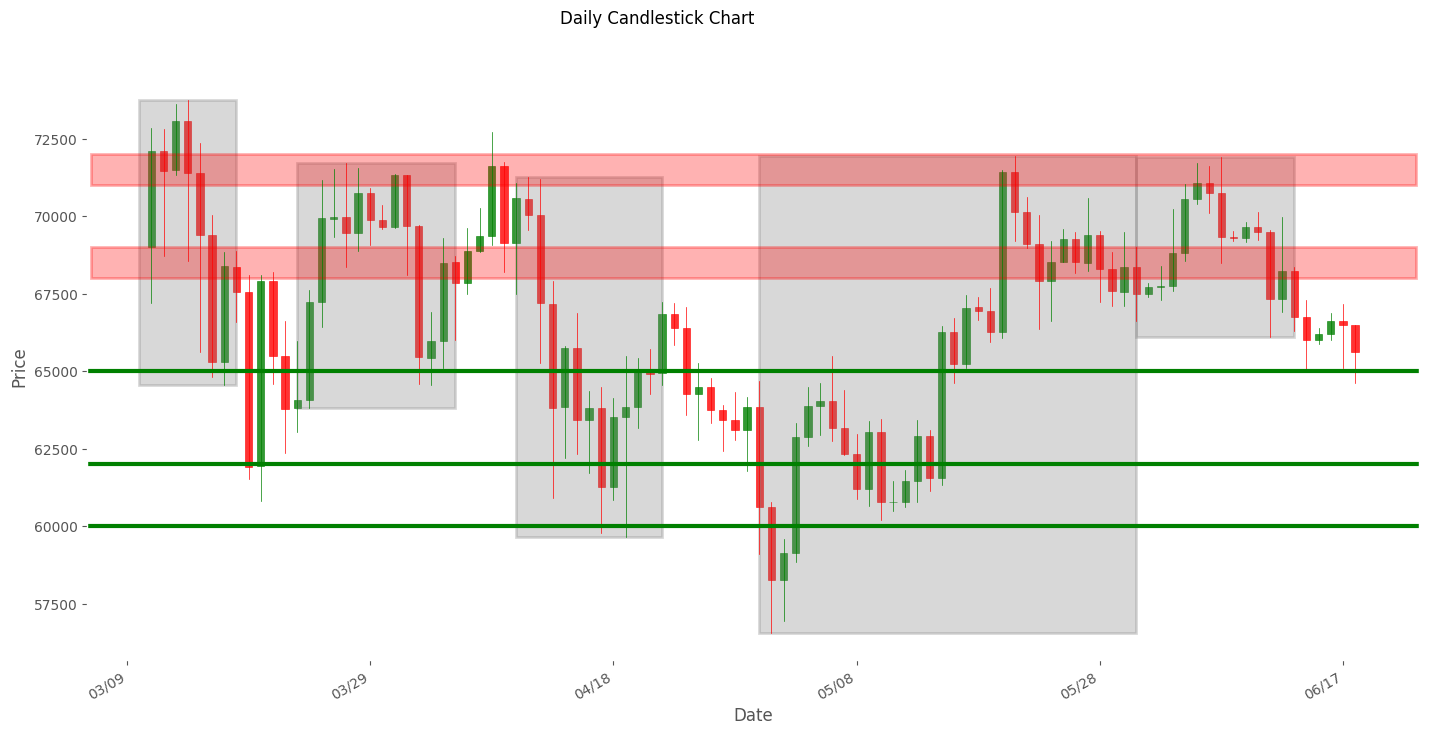

In [38]:
#PlottingAnswer

plt.style.use('ggplot')

CongCons = SecondFormatted.copy()
btc = btcdata.copy()

# Extracting Data for plotting
ohlc = btc.loc[:, ['Date', 'Open', 'High', 'Low', 'Close']]
ohlc['Date'] = pd.to_datetime(ohlc['Date'], format = "%m-%d")
ohlc['Date'] = ohlc['Date'].apply(mpl_dates.date2num)
ohlc = ohlc.astype(float)

zigzagplot = zzdf.copy()
zigzagplot['Date'] = pd.to_datetime(zigzagplot['Date'], format = "%m-%d")
zigzagplot['Date'] = zigzagplot['Date'].apply(mpl_dates.date2num)
zigzagplot = zigzagplot.astype(float)

# Creating Subplots
fig, ax = plt.subplots()

candlestick_ohlc(ax, ohlc.values, width=0.6, colorup='green', colordown='red', alpha=0.8)

#ax.plot(zigzagplot["Date"], zigzagplot["ZZ"], color="black")

# Setting labels & titles
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_facecolor('white')
fig.suptitle('Daily Candlestick Chart')

# Formatting Date
date_format = mpl_dates.DateFormatter('%m/%d')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()

fig.tight_layout()
fig.set_size_inches(16,8)

#Adding levels and areas to Plot

for x in CongCons:

    AreaColor = "Gray"
    
    AreaStartDate = pd.to_datetime(x["Area Start Date"], format = "%m-%d")
    AreaDaysSpent = int(x["Area Time Duration"])
    AreaEndDate = pd.to_datetime(x["Area Start Date"], format = "%m-%d") + timedelta(days = AreaDaysSpent)

    PricesRange = btc[(pd.to_datetime(btc["Date"], format = "%m-%d") >= AreaStartDate) & (pd.to_datetime(btc["Date"], format = "%m-%d") <= AreaEndDate)]

    UpperBound = max(PricesRange["High"])
    LowerBound = min(PricesRange["Low"])
    BoundDiff = UpperBound - LowerBound

    ax.add_patch(Rectangle((AreaStartDate - timedelta(days = 1), LowerBound), timedelta(days = AreaDaysSpent +1), BoundDiff,
             edgecolor = AreaColor,
             facecolor = AreaColor,
             fill = True,
             lw = 2,
             alpha = 0.3))

for x in SuppResDict:
    AreaType = x["Area Type"].split(" ")

    AreaColor = "Gray"
    
    if AreaType[0] == "Support":
        AreaColor = "Green"

    elif AreaType[0] == "Resistance":
        AreaColor = "Red"

    if AreaType[-1] == "Level":
        #Plotting Level as Horizontal Line
        plt.axhline(y = x["Area Level"], color = AreaColor, lw = 3)
        
    elif AreaType[-1] == "Area":
        #Plotting Area as RectangleBox
        Bounds = x["Area Range"].split("-")
        
        UpperBound = int(Bounds[-1])
        LowerBound = int(Bounds[0])

        RangeDiff = abs(UpperBound - LowerBound)

        StartDate = pd.to_datetime(btc.Date.iloc[0], format="%m-%d")
        
        ax.add_patch(Rectangle((StartDate - timedelta(days = 5), LowerBound), timedelta(days = len(ohlc) + 9), RangeDiff,
             edgecolor = AreaColor,
             facecolor = AreaColor,
             fill = True,
             lw = 2,
             alpha = 0.3))
    
    else:
        #Skipping for now in case of Formatting Error
        continue

In [39]:
#For Each Trading Range, Extract Information and analyze it with the LLM.
Index = 0
SecondDictSubset = btcdata[(btcdata["Date"] >= SecondDict[Index]["Area Start Date"]) & (pd.to_datetime(btcdata["Date"], format = "%m-%d") <= pd.to_datetime(SecondDict[Index]["Area Start Date"], format = "%m-%d") + timedelta(days=int(SecondDict[Index]["Area Time Duration"])))]
SecondDictSubset

,Date,Open,High,Low,Close,Volume
0,03-11,69020.546875,72850.710938,67194.882813,72123.906250,65716656765
1,03-12,72125.125000,72825.656250,68728.851563,71481.289063,62554434520
2,03-13,71482.117188,73637.476563,71334.093750,73083.500000,48212536929
3,03-14,73079.375000,73750.070313,68563.023438,71396.593750,59594605698
4,03-15,71387.875000,72357.132813,65630.695313,69403.773438,78320453976
5,03-16,69392.484375,70046.273438,64801.394531,65315.117188,46842198371
6,03-17,65316.343750,68845.718750,64545.316406,68390.625000,44716864318
7,03-18,68371.304688,68897.132813,66594.226563,67548.593750,49261579492


In [40]:
SecondDict

[{'Area Start Date': '03-11', 'Area Time Duration': 7},
 {'Area Start Date': '03-24', 'Area Time Duration': 12},
 {'Area Start Date': '04-11', 'Area Time Duration': 11},
 {'Area Start Date': '05-01', 'Area Time Duration': 15},
 {'Area Start Date': '05-16', 'Area Time Duration': 15},
 {'Area Start Date': '06-01', 'Area Time Duration': 12}]

In [41]:
# Checking that the Congestion Zone is actually accurate

TestSystemPromptCoT = \
'''
You are a Financial Markets Trader and Analyst, and your job is to look at and interpret price action fluctuations.
You are highly Specialized in finding Trading Ranges, in the form of Congestion and Consolidation Areas, where Highs and Lows cluster around the same value for consecutive sessions.
Trading Ranges are also Identified by small body sizes where the cumulative sum of price changes from close to close is around the starting level for some consecutive session.
For Example, a good Trading Range is such that Highs and Lows are clustered around the same price level with a margin of error of approximately 500$, while the Cumulative Sum of Close Prices is around the starting point drawing some sort of zigzag in Closing Prices.
As a Proof of Concept supporting the Trading Range Formation Theory described above, Connecting the First High with the First Low, The Last Low and the Last High should form a perfectly shaped Horizontal rectangle.
Always keep in mind that your job is, given a set of Trading Ranges and Support and Resistance Levels and Zones, to actually find zones in the Price Action that have been stagnating around the Same Level.
Lastly, a Trading Range is accurate, when it's either in the middle of a Support or Resistance Level or Zone, or Between Support or Resistance Level or Zone, Where in the first case, the Support or Resistance Zone or Level is in the middle of Open and Close Prices, and in the Second Case Highs are clustering at the Higher Level and Lows areclustering at the Lower Level.
'''

SecondIntroductionChain = \
'''
Now, I want you to find potential Trading Ranges.

The Dasatet Format Will be as follow:

Date, High, Low, Change From Previous Close

Where, the Date is the Date of the session, High is the high price for that given session, Low is the Low price for that given session and Change From Previous Close is the difference in price from the Actual Close to the Previous one.
The Dataset given will only contain  candlesticks.

Here's the Dataset:

Date, High, Low, Change From Previous Close

{DATASET}

Lastly, you are given all the Support and Resistance Levels and Zones that are nearby the Trading Range. 

{SUPPRES}

The Returned Answer should be a bullet point list of Hypothesized Trading Ranges with the Trading Range Start Date as well as how much time the Price spent in that Area.
Return the answer and the answer only, without adding anything before and after it.
'''

In [42]:
MidPoint = [int(row[1] + (row[4] - row[1])/2) for i, row in enumerate(btcdata.itertuples(index=False))]
print(MidPoint)

[70572, 71803, 72282, 72237, 70395, 67353, 66853, 67959, 64734, 64921, 66701, 64634, 63932, 65652, 68596, 69959, 69723, 70098, 70318, 69769, 70490, 70517, 67575, 65713, 67242, 68176, 68368, 69129, 70496, 70385, 69864, 70318, 68628, 65504, 64787, 64582, 63615, 62554, 62394, 63677, 64422, 64959, 65886, 66623, 65342, 64378, 64120, 63585, 63268, 63473, 62238, 59431, 58688, 61006, 63391, 63961, 63600, 62748, 61760, 62120, 61923, 60793, 61120, 62176, 62226, 63910, 65743, 66141, 67003, 66608, 68863, 70789, 69628, 68525, 68227, 68896, 68891, 68953, 68844, 67937, 67970, 67926, 67598, 67730, 68279, 69686, 70825, 70920, 70050, 69314, 69472, 69578, 68420, 67781, 67499, 66379, 66098, 66414, 66563, 66061]


In [43]:
AvgChangeMid = int(sum(MidPoint)/len(MidPoint))
AvgChangeMid

66692

In [44]:
mid = pd.DataFrame(ohlc["Date"].copy())
mid["MidPoint"] = MidPoint
mid

,Date,MidPoint
0,-25498.0,70572
1,-25497.0,71803
2,-25496.0,72282
3,-25495.0,72237
4,-25494.0,70395
...,...,...
95,-25403.0,66379
96,-25402.0,66098
97,-25401.0,66414
98,-25400.0,66563


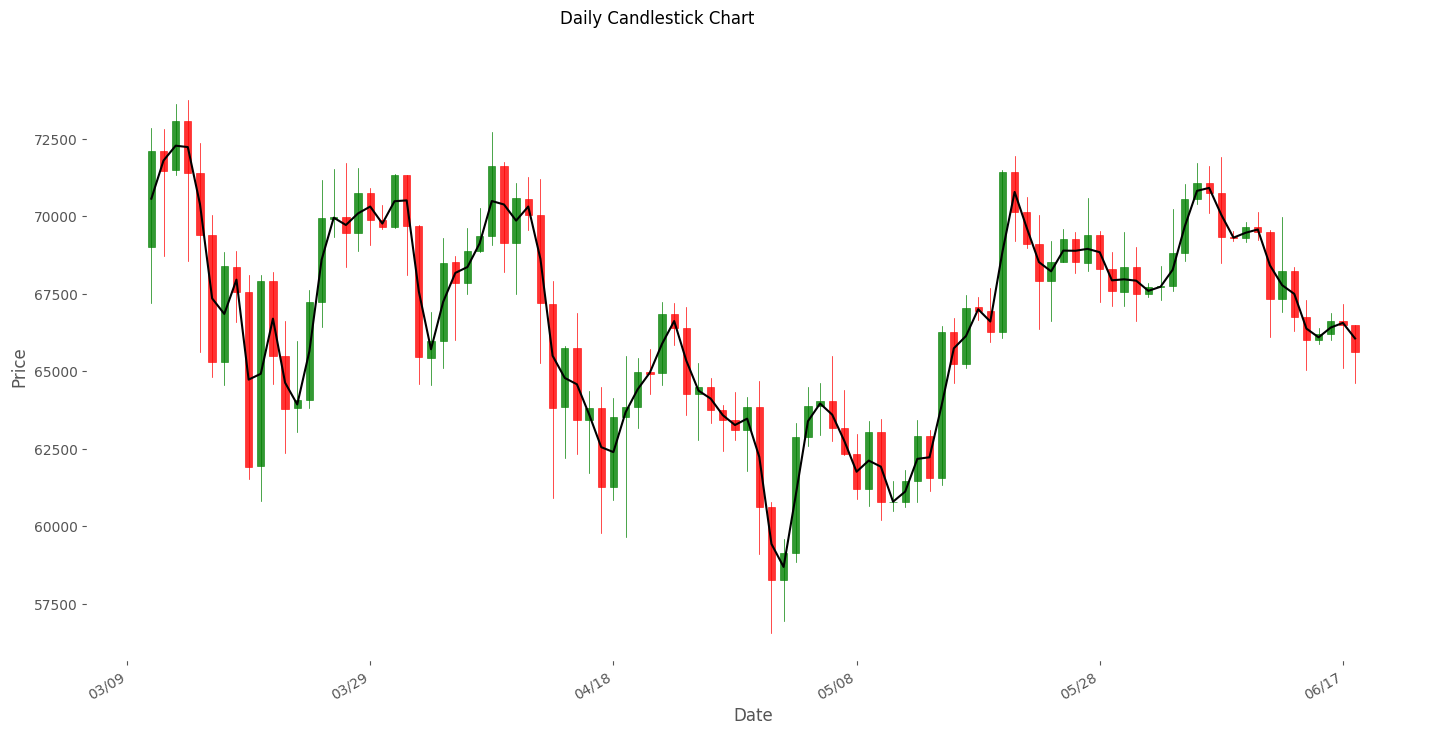

In [45]:
plt.style.use('ggplot')

btc = btcdata.copy()

# Extracting Data for plotting
ohlc = btc.loc[:, ['Date', 'Open', 'High', 'Low', 'Close']].copy()
ohlc['Date'] = pd.to_datetime(ohlc['Date'], format = "%m-%d")
ohlc['Date'] = ohlc['Date'].apply(mpl_dates.date2num)
ohlc = ohlc.astype(float)

mid = pd.DataFrame(btc["Date"].copy())
mid["MidPoint"] = MidPoint
mid['Date'] = pd.to_datetime(mid['Date'], format = "%m-%d")
mid['Date'] = mid['Date'].apply(mpl_dates.date2num)
mid = mid.astype(float)

# Creating Subplots
fig, ax = plt.subplots()

candlestick_ohlc(ax, ohlc.values, width=0.6, colorup='green', colordown='red', alpha=0.8)

ax.plot(mid["Date"], mid["MidPoint"], color="black")

# Setting labels & titles
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_facecolor('white')
fig.suptitle('Daily Candlestick Chart')

# Formatting Date
date_format = mpl_dates.DateFormatter('%m/%d')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()

fig.tight_layout()
fig.set_size_inches(16,8)


In [67]:
AvgPChange = [abs(((MidPoint[x] - MidPoint[x-1])/MidPoint[x-1])*100) for x in range(1, len(MidPoint))]
APC = np.mean(AvgPChange)
APC

1.3680963212634623

In [81]:
round(round(APC / 0.1) * 0.1, 2)

1.4

In [95]:
Threshold = 1.4
#MidPoint

AnchoredMid = []
AnchoredMid.append(MidPoint[0])

for x in range(1, len(MidPoint)):
    ChangePcent = (((MidPoint[x] - AnchoredMid[x-1])/AnchoredMid[x-1])*100)

    if abs(ChangePcent) <= Threshold:
        AnchoredMid.append(AnchoredMid[x-1])

    else:
        AnchoredMid.append(MidPoint[x])

amid = pd.DataFrame(btcdata["Date"].copy())
amid["MidPoint"] = AnchoredMid
amid

,Date,MidPoint
0,03-11,70572
1,03-12,71803
2,03-13,71803
3,03-14,71803
4,03-15,70395
...,...,...
95,06-14,66379
96,06-15,66379
97,06-16,66379
98,06-17,66379


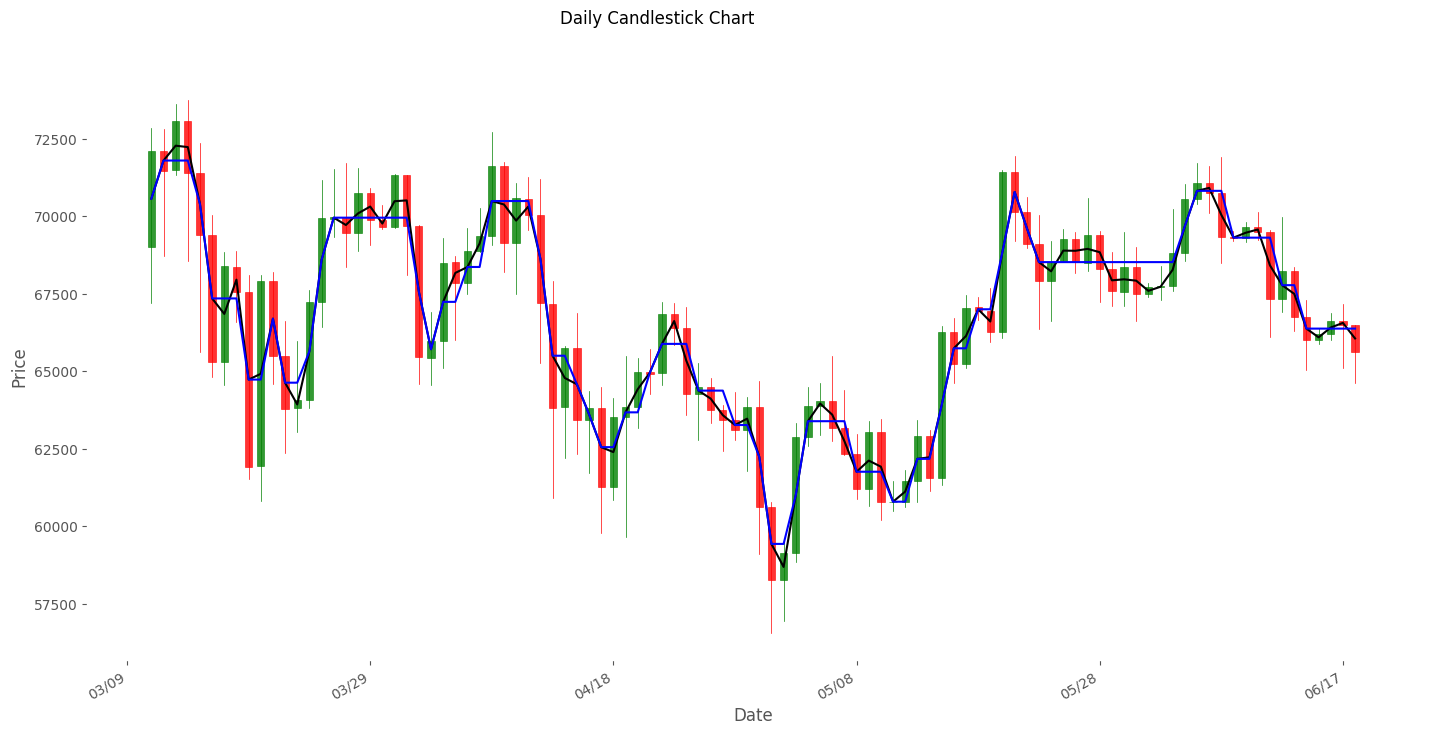

In [83]:
plt.style.use('ggplot')

btc = btcdata.copy()

# Extracting Data for plotting
ohlc = btc.loc[:, ['Date', 'Open', 'High', 'Low', 'Close']].copy()
ohlc['Date'] = pd.to_datetime(ohlc['Date'], format = "%m-%d")
ohlc['Date'] = ohlc['Date'].apply(mpl_dates.date2num)
ohlc = ohlc.astype(float)

mid = pd.DataFrame(btc["Date"].copy())
mid["MidPoint"] = MidPoint
mid['Date'] = pd.to_datetime(mid['Date'], format = "%m-%d")
mid['Date'] = mid['Date'].apply(mpl_dates.date2num)
mid = mid.astype(float)

amid = pd.DataFrame(btc["Date"].copy())
amid["MidPoint"] = AnchoredMid
amid['Date'] = pd.to_datetime(amid['Date'], format = "%m-%d")
amid['Date'] = amid['Date'].apply(mpl_dates.date2num)
amid = amid.astype(float)

# Creating Subplots
fig, ax = plt.subplots()

candlestick_ohlc(ax, ohlc.values, width=0.6, colorup='green', colordown='red', alpha=0.8)

ax.plot(mid["Date"], mid["MidPoint"], color="black")
ax.plot(mid["Date"], amid["MidPoint"], color="blue")

# Setting labels & titles
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_facecolor('white')
fig.suptitle('Daily Candlestick Chart')

# Formatting Date
date_format = mpl_dates.DateFormatter('%m/%d')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()

fig.tight_layout()
fig.set_size_inches(16,8)


In [106]:
Ranges = {}

for idx, row in enumerate(amid.iloc[1:].itertuples(index=False)):
    if AnchoredMid[idx] == row[1]:
        if row[1] not in list(Ranges.keys()):
            Ranges[row[1]] = [amid["Date"].iloc[idx], row[0]]

        else:
            Ranges[row[1]].append(row[0])

In [116]:
toPop = []
for x in list(Ranges.keys()):
    if len(Ranges[x]) <= 3:
        toPop.append(x)

for x in toPop:
    Ranges.pop(x)

In [117]:
Ranges

{69959: ['03-26', '03-27', '03-28', '03-29', '03-30', '03-31', '04-01'],
 70496: ['04-08', '04-09', '04-10', '04-11'],
 63391: ['05-04', '05-05', '05-06', '05-07'],
 68525: ['05-23',
  '05-24',
  '05-25',
  '05-26',
  '05-27',
  '05-28',
  '05-29',
  '05-30',
  '05-31',
  '06-01',
  '06-02',
  '06-03'],
 69314: ['06-08', '06-09', '06-10', '06-11'],
 66379: ['06-14', '06-15', '06-16', '06-17', '06-18']}

In [42]:
ChangeFromPrevClose = [int(row[4] - btcdata["Close"].iloc[i]) for i, row in enumerate(btcdata.iloc[1:].itertuples(index=False))]

In [43]:
print(ChangeFromPrevClose)

[-642, 1602, -1686, -1992, -4088, 3075, -842, -5635, 6000, -2422, -1712, 283, 3171, 2724, 29, -532, 1289, -852, -247, 1688, -1631, -4255, 533, 2528, -671, 1058, 466, 2268, -2492, 1448, -527, -2864, -3374, 1917, -2312, 385, -2535, 2236, 330, 1150, -67, 1911, -430, -2130, 204, -726, -336, -305, 727, -3204, -2382, 869, 3766, 1001, 139, -869, -827, -1146, 1862, -2257, 0, 654, 1453, -1348, 4714, -1035, 1820, -111, -662, 5169, -1311, -1014, -1192, 596, 739, -747, 876, -1098, -718, 786, -873, 215, 44, 1053, 1762, 515, -325, -1414, -36, 342, -135, -2180, 909, -1484, -745, 179, 448, -148, -857]


In [44]:
TextHLC = "\n".join([f'{row[0]}, {int(row[2])}, {int(row[3])}, {ChangeFromPrevClose[i]}' for i, row in enumerate(btcdata.iloc[1:].itertuples(index=False))])

In [45]:
print(TextHLC)

03-12, 72825, 68728, -642
03-13, 73637, 71334, 1602
03-14, 73750, 68563, -1686
03-15, 72357, 65630, -1992
03-16, 70046, 64801, -4088
03-17, 68845, 64545, 3075
03-18, 68897, 66594, -842
03-19, 68106, 61536, -5635
03-20, 68115, 60807, 6000
03-21, 68199, 64580, -2422
03-22, 66623, 62355, -1712
03-23, 65976, 63038, 283
03-24, 67622, 63825, 3171
03-25, 71162, 66414, 2724
03-26, 71535, 69335, 29
03-27, 71727, 68381, -532
03-28, 71546, 68895, 1289
03-29, 70913, 69076, -852
03-30, 70355, 69601, -247
03-31, 71377, 69624, 1688
04-01, 71342, 68110, -1631
04-02, 69708, 64586, -4255
04-03, 66914, 64559, 533
04-04, 69291, 65113, 2528
04-05, 68725, 66011, -671
04-06, 69629, 67491, 1058
04-07, 70284, 68851, 466
04-08, 72715, 69064, 2268
04-09, 71742, 68212, -2492
04-10, 71093, 67503, 1448
04-11, 71256, 69571, -527
04-12, 71222, 65254, -2864
04-13, 67931, 60919, -3374
04-14, 65824, 62205, 1917
04-15, 66878, 62332, -2312
04-16, 64355, 61716, 385
04-17, 64486, 59768, -2535
04-18, 64125, 60833, 2236
04-19

In [46]:
SR = "\n".join([f'{list(x.values())[0]}, {list(x.values())[1]}' for x in SuppResDict])
print(SR)

Support Level, 60000
Support Level, 62000
Support Level, 65000
Resistance Area, 68000-69000
Resistance Area, 71000-72000


In [47]:
SecondChainIntroComplete = SecondIntroductionChain.replace("{DATASET}", TextHLC).replace("{SUPPRES}", SR)

In [48]:
messages = [
            {
                "role": "system",
                "content": TestSystemPromptCoT
            },
            {
                "role": "user",
                "content": SecondChainIntroComplete
            }
            ]

model="llama3-70b-8192"
temperature=0.8
max_tokens=8192
top_p=1
seed=7688
stream=False

CoTFirstChain = GetAnswerGroqLlama70b(messages, model, temperature, max_tokens, top_p, seed, stream)

print(CoTFirstChain)

• 03-20 to 03-27: 7 days, within 68000-69000 Resistance Area
• 04-04 to 04-10: 6 days, around 69000 Support Level
• 04-22 to 04-29: 7 days, within 68000-69000 Resistance Area
• 05-10 to 05-17: 7 days, around 65000 Support Level
• 05-22 to 05-30: 8 days, within 68000-69000 Resistance Area
• 06-02 to 06-09: 7 days, around 69000 Support Level


In [49]:
FirstChainFormatTemplate = \
'''
Now reformulate the previous answer in a "Dataset" format, as follows:

Area Start Date, Area Time Duration

Where Area Time Duration must be expressed in days.

Return the Dataset only as JSON Format, and do not add anything before and after it.
'''

messages = [
            {
                "role": "system",
                "content": TestSystemPromptCoT
            },
            {
                "role": "user",
                "content": SecondChainIntroComplete
            },
            {
                "role": "assistant",
                "content": CoTFirstChain
            },
            {
                "role": "user",
                "content": FirstChainFormatTemplate
            },
            ]

model="llama3-70b-8192"
temperature=0.8
max_tokens=8192
top_p=1
seed=7688
stream=False

CoTFirstFormatted = GetAnswerGroqLlama70b(messages, model, temperature, max_tokens, top_p, seed, stream)

print(json.loads(CoTFirstFormatted))

[{'Area Start Date': '03-20', 'Area Time Duration': 7}, {'Area Start Date': '04-04', 'Area Time Duration': 6}, {'Area Start Date': '04-22', 'Area Time Duration': 7}, {'Area Start Date': '05-10', 'Area Time Duration': 7}, {'Area Start Date': '05-22', 'Area Time Duration': 8}, {'Area Start Date': '06-02', 'Area Time Duration': 7}]


In [50]:
CoTFirstFormattedJSON = json.loads(CoTFirstFormatted)
print(CoTFirstFormattedJSON)

[{'Area Start Date': '03-20', 'Area Time Duration': 7}, {'Area Start Date': '04-04', 'Area Time Duration': 6}, {'Area Start Date': '04-22', 'Area Time Duration': 7}, {'Area Start Date': '05-10', 'Area Time Duration': 7}, {'Area Start Date': '05-22', 'Area Time Duration': 8}, {'Area Start Date': '06-02', 'Area Time Duration': 7}]


In [51]:
Subsets = []
for x in CoTFirstFormattedJSON:
    SecondDictSubset = btcdata[(btcdata["Date"] >= x["Area Start Date"]) & (pd.to_datetime(btcdata["Date"], format = "%m-%d") <= pd.to_datetime(x["Area Start Date"], format = "%m-%d") + timedelta(days=int(x["Area Time Duration"])))]
    #print(SecondDictSubset)
    
    Subsets.append(SecondDictSubset)

In [52]:
Evaluate = \
'''
I've seen you have identified the Following Trading Range, from {STARTDATE}.
I want you now to map the highs and lows of the Trading Range and see if they form a perfectly shaped horizontal rectangle.
If they don't, would you think it would be wiser to simply drop some Data Points that are out of context, or it would be better to reject the hypothesys of a Trading Range?

Here's the Complete Dataset:

Open, High, Low, Close

{DATASET}
'''


In [53]:
TextOHLC = "\n".join([f'{int(row[1])}, {int(row[2])}, {int(row[3])}, {int(row[4])}' for i, row in enumerate(Subsets[0].itertuples(index=False))])
Evaluate.replace("{STARTDATE}", Subsets[0]["Date"][0]).replace("{DATASET}", TextOHLC)

messages = [
            {
                "role": "system",
                "content": TestSystemPromptCoT
            },
            {
                "role": "user",
                "content": SecondChainIntroComplete
            },
            {
                "role": "assistant",
                "content": CoTFirstChain
            },
            {
                "role": "user",
                "content": Evaluate
            },
            ]

model="llama3-70b-8192"
temperature=0.8
max_tokens=8192
top_p=1
seed=7688
stream=False

CoTSecondChain = GetAnswerGroqLlama70b(messages, model, temperature, max_tokens, top_p, seed, stream)

print(CoTSecondChain)

KeyError: 0

In [ ]:
Evaluate = "Now Evaluate each of the Trading Ranges and see if they form a perfectly shaped horizontal rectangle"

messages = [
            {
                "role": "system",
                "content": TestSystemPromptCoT
            },
            {
                "role": "user",
                "content": SecondChainIntroComplete
            },
            {
                "role": "assistant",
                "content": CoTFirstChain
            },
            {
                "role": "user",
                "content": Evaluate
            }
            ]

model="llama3-70b-8192"
temperature=0.8
max_tokens=8192
top_p=1
seed=7688
stream=False

CoTSecondChain = GetAnswerGroqLlama70b(messages, model, temperature, max_tokens, top_p, seed, stream)

print(CoTSecondChain)

---

# **Building an Inference Class**

In [ ]:
#Prompts 
SystemPrompt = \
'''
You are a Financial Markets Trader and Analyst, and your job is to look at and interpret price action fluctuations.
Then, after you've digested and analysed them, you will return an elaborated technical summary of what happened throughout the trading day based on the user request.
More specifically, your task is, given a simple narrow request and some contextual data, to generate a neutral technical analysis summary based on the request made by the user, without giving any suggestions or investment advice to potential traders and investors.
'''

FirstQuery = \
'''
Identify key levels of price that have been support and resistance by analyzing the frequency and clustering of ZigZag Indicator values around specific price levels.
The support and resistance price levels should not be too precise, instead, they need to be rounded up or down, rather than specific value.
You should also point out how many times the given support or resistance price level has been touched, to emphasize its strength and importance.
'''

FirstPromptTemplate = \
'''
I want you to:

{QUESTION}

The Dataset you'll be given will be in this format:

Date, ZigZagIndicator

Where, Date is the date, formatted as month-day, when the ZigZag Indicator Swing has completed, and ZigZagIndicator is the actual point of Swing from the previous ZigZag Point.
The Dataset given will not contain any candlesticks, and the expected final goal will be an overview rather than a technical analysis.

Here's the Dataset:

Date, ZigZagIndicator

{DATASET}

Return the answer and the answer only, without adding anything before and after it.
'''

FormatTemplate = \
'''
Now reformulate the previous answer in a "Dataset" format, as follows:

Area Type, Area Level, Number of Bounces

Return the Dataset only as JSON Format.
'''

DatasetHLZZ = "\n".join([f'{row[0]}, {round(row[1],2)}' for i, row in enumerate(zzdf.itertuples(index=False))])


In [ ]:
#Wrapping Up Section

#Setting Groq client
from groq import Groq

GroqClient = Groq(
    api_key=os.environ.get("GROQ_API_KEY"),
)

#Wrapping Up Inference as Class
class Inference:
    def __init__(self, Llama: str, Temperature: float, MaxTokens: int, TopP: float, Seed: int, Stream: bool):
        self.Model = Llama
        self.Temperature = Temperature
        self.MaxTokens = MaxTokens
        self.TopP = TopP
        self.Seed = Seed
        self.Stream = Stream

    #Inference from Complete Prompt and for Formatting to JSON
    def Inference(self, Chat: List[Dict[str, str]]) -> str:
        InferenceOutput = GroqClient.chat.completions.create(
                messages = Chat,
                model = self.Model,
                temperature = self.Temperature,
                max_tokens = self.MaxTokens,
                top_p = self.TopP,
                seed = self.Seed,
                stream = self.Stream,
                stop = None
            )
        
        return InferenceOutput.choices[0].message.content
    
    #Better Parsing and Formatting for Plotting
    def FormatForPlotting(self, InferenceOutputJSON: List[Dict]) -> List[Dict]:
        FormattedOutput = []
        
        for x in range(1, len(InferenceOutputJSON)):
            if abs(int(InferenceOutputJSON[x]["Area Level"]) - int(InferenceOutputJSON[x-1]["Area Level"])) <= 1000:
                if len(FormattedOutput) > 0:
                    if "Area Range" in list(FormattedOutput[-1].keys()):
                        RangeStart = FormattedOutput[-1]["Area Range"].split("-")[0]
                        Temp = {"Area Type": InferenceOutputJSON[x]["Area Type"] + " Area", "Area Range": str(RangeStart) + "-" + str(InferenceOutputJSON[x]["Area Level"]), "Bounces": int(FormattedOutput[-1]["Bounces"]) + int(InferenceOutputJSON[x]["Number of Bounces"])}
                        
                        FormattedOutput.pop()
                        FormattedOutput.append(Temp)
        
                        continue
                        
                    else:
                        FormattedOutput.pop()
        
                FormattedOutput.append({"Area Type": InferenceOutputJSON[x]["Area Type"] + " Area", "Area Range": str(InferenceOutputJSON[x-1]["Area Level"]) + "-" + str(InferenceOutputJSON[x]["Area Level"]), "Bounces": int(InferenceOutputJSON[x-1]["Number of Bounces"]) + int(InferenceOutputJSON[x]["Number of Bounces"])})
            
            else:
                if len(FormattedOutput) == 0:
                    FormattedOutput.append({"Area Type": InferenceOutputJSON[x-1]["Area Type"] + " Level", "Area Level": int(InferenceOutputJSON[x-1]["Area Level"]), "Bounces": int(InferenceOutputJSON[x-1]["Number of Bounces"])})
                
                FormattedOutput.append({"Area Type": InferenceOutputJSON[x]["Area Type"] + " Level", "Area Level": int(InferenceOutputJSON[x]["Area Level"]), "Bounces": int(InferenceOutputJSON[x]["Number of Bounces"])})

        return FormattedOutput
        
    #Building the Plot
    def ReturnPlot(self, FormattedOutput: List[Dict], btcdata: pd.DataFrame, zigzagdata: pd.DataFrame) -> Figure:
        plt.style.use('ggplot')

        SuppRes = FormattedOutput.copy()
        btc = btcdata.copy()

        # Extracting Data for plotting
        ohlc = btc.loc[:, ['Date', 'Open', 'High', 'Low', 'Close']]
        ohlc['Date'] = pd.to_datetime(ohlc['Date'], format = "%m-%d")
        ohlc['Date'] = ohlc['Date'].apply(mpl_dates.date2num)
        ohlc = ohlc.astype(float)
        
        zigzagplot = zzdf.copy()
        zigzagplot['Date'] = pd.to_datetime(zigzagplot['Date'], format = "%m-%d")
        zigzagplot['Date'] = zigzagplot['Date'].apply(mpl_dates.date2num)
        zigzagplot = zigzagplot.astype(float)

        # Creating Subplots
        fig, ax = plt.subplots()
        
        #Plotting Candlesticks Chart
        candlestick_ohlc(ax, ohlc.values, width=0.6, colorup='green', colordown='red', alpha=0.8)
        
        #Plotting ZigZag Indicator
        ax.plot(zigzagplot["Date"], zigzagplot["ZZ"], color="black")
        
        # Setting labels & titles
        ax.set_xlabel('Date')
        ax.set_ylabel('Price')
        ax.set_facecolor('white')
        fig.suptitle('Daily Candlestick Chart')
        
        # Formatting Date
        date_format = mpl_dates.DateFormatter('%m/%d')
        ax.xaxis.set_major_formatter(date_format)
        fig.autofmt_xdate()
        
        fig.tight_layout()
        fig.set_size_inches(16,8)
        
        #Adding levels and areas to Plot
        
        for x in SuppRes:
            AreaType = x["Area Type"].split(" ")
        
            AreaColor = "Gray"
            
            if AreaType[0] == "Support":
                AreaColor = "Green"
        
            elif AreaType[0] == "Resistance":
                AreaColor = "Red"
        
            if AreaType[-1] == "Level":
                #Plotting Level as Horizontal Line
                plt.axhline(y = x["Area Level"], color = AreaColor, lw = 3)
                
            elif AreaType[-1] == "Area":
                #Plotting Area as RectangleBox
                Bounds = x["Area Range"].split("-")
                
                UpperBound = int(Bounds[-1])
                LowerBound = int(Bounds[0])
        
                RangeDiff = abs(UpperBound - LowerBound)
        
                StartDate = pd.to_datetime(btc.Date.iloc[0], format = "%m-%d")
                
                ax.add_patch(Rectangle((StartDate - timedelta(days = 5), LowerBound), timedelta(days = len(ohlc) + 9), RangeDiff,
                     edgecolor = AreaColor,
                     facecolor = AreaColor,
                     fill = True,
                     lw = 2,
                     alpha = 0.3))
            
            else:
                #Skipping for now in case of Formatting Error
                continue
        
        return fig

# **Testing the Inference Class**

In [ ]:
Llama = Inference(model, temperature, max_tokens, top_p, seed, stream)

In [ ]:
FirstFullPrompt = FirstPromptTemplate.replace("{QUESTION}", FirstQuery).replace("{DATASET}", TextZZ)
Chat = [
        {
            "role": "system",
            "content": SystemPrompt
        },
        {
            "role": "user",
            "content": FirstFullPrompt
        },
    ]

Answer = Llama.Inference(Chat)
print(Answer)

In [ ]:
Chat[0]["content"] = Chat[0]["content"] + \
"Eventually, the returned answers must be in JSON format if specifically requested by the user."

Chat.append({
            "role": "assistant",
            "content": Answer
            })
Chat.append({
            "role": "user",
            "content": FormatTemplate
            })

AnswerJSON = json.loads(Llama.Inference(Chat))

print(AnswerJSON)

In [ ]:
FormattedForPlot = Llama.FormatForPlotting(AnswerJSON)
print(FormattedForPlot)

In [ ]:
fig = Llama.ReturnPlot(FormattedForPlot, btcdata, zzdf)

# **Wrapper Function around Class to make it even easier.**
# **Used to play with the Prompts Techniques and automate plotting to get visual results immediately.**

In [ ]:
#Wrapping up all Together for Faster Prototyping

model = "llama3-70b-8192"
temperature = 0.8
max_tokens = 8192
top_p = 1
seed = 7688
stream = False

Llama = Inference(model, temperature, max_tokens, top_p, seed, stream)

#This function automates all the steps from Prompting to Plotting. (Few-shot w/ no Self-Consistency)
#Step 1) Takes the Prompt Template and build the (First) Final Full Prompt (First User Entry) with QueryInstructionPrompt and Contextual Text Data.
#Step 2) Build the Initial Chain with Chat History as SystemPrompt -> First User Entry (First Full Prompt).
#Step 3) First Inference on the Chain built in Step 2. -> Returns Output as FirstChainAnswer.
#Step 4) Creates a Copy of the Starting ChatChain built in Step 2, then Slightly Modifies the System Prompt to return JSON and Appends to the Chain the Answer Obtained in Step 3 and Formats the Output as JSON.
#Step 5) Formats for Plotting the JSON Answer Obtained in Step 4.
#Step 6) Builds the Plot with the Data Obtained in Step 5 and Return the Matplotlib Pyplot Figure Object.
#Step 7) Finally Returns the Plot obtained in Step 6.

#NOTE: The Function yields values along the way for better Debugging and Tracing.

def PromptToPlot(DataOHLC: pd.DataFrame, ContextData: pd.DataFrame, SystemPrompt: str, QueryInstructionPrompt:str, ContextDataText: str,  InputPromptTemplate: str, FormatTemplate: str) -> Figure:    
    #Step 1
    StartingFullPrompt = InputPromptTemplate.replace("{QUESTION}", QueryInstructionPrompt).replace("{DATASET}", ContextDataText)

    #Yielding Step 1
    yield StartingFullPrompt
    
    #Step 2
    ChatChain = [
                    {
                        "role": "system",
                        "content": SystemPrompt
                    },
        
                    {
                        "role": "user",
                        "content": StartingFullPrompt
                    },
                ]

    #Step 3
    FirstChainAnswer = Llama.Inference(ChatChain)

    #Yielding Step 3
    yield FirstChainAnswer
    
    #Step 4
    FormatChain = ChatChain.copy()
    
    FormatChain[0]["content"] = Chat[0]["content"] + \
    "Eventually, the returned answers must be in JSON format if specifically requested by the user."

    FormatChain.append({
                "role": "assistant",
                "content": FirstChainAnswer
                })
    
    FormatChain.append({
                "role": "user",
                "content": FormatTemplate
                })

    AnswerJSON = json.loads(Llama.Inference(FormatChain))

    #Yielding Step 4
    yield AnswerJSON
    
    #Step 5
    FormattedForPlot = Llama.FormatForPlotting(AnswerJSON)

    #Yielding Step 5
    yield FormattedForPlot
    
    #Step 6
    Plot = Llama.ReturnPlot(FormattedForPlot, DataOHLC, ContextData)

    #Step 7
    yield Plot

# Playground

In [ ]:
#PROMPTS TO PLAY WITH

SystemPrompt = \
'''
You are a Financial Markets Trader and Analyst, and your job is to look at and interpret price action fluctuations.
Then, after you've digested and analysed them, you will return an elaborated technical summary of what happened throughout the trading day based on the user request.
More specifically, your task is, given a simple narrow request and some contextual data, to generate a neutral technical analysis summary based on the request made by the user, without giving any suggestions or investment advice to potential traders and investors.
'''

InstructionQuery = \
'''
Identify key levels of price that have been support and resistance by analyzing the frequency and clustering of ZigZag Indicator values around specific price levels.
The support and resistance price levels should not be too precise, instead, they need to be rounded up or down, rather than specific value.
You should also point out how many times the given support or resistance price level has been touched, to emphasize its strength and importance.
'''

PromptTemplate = \
'''
I want you to:

{QUESTION}

The Dataset you'll be given will be in this format:

Date, ZigZagIndicator

Where, Date is the date, formatted as month-day, when the ZigZag Indicator Swing has completed, and ZigZagIndicator is the actual point of Swing from the previous ZigZag Point.
The Dataset given will not contain any candlesticks, and the expected final goal will be an overview rather than a technical analysis.

Here's the Dataset:

Date, ZigZagIndicator

{DATASET}

Return the answer and the answer only, without adding anything before and after it.
'''

FormatTemplate = \
'''
Now reformulate the previous answer in a "Dataset" format, as follows:

Area Type, Area Level, Number of Bounces

Return the Dataset only as JSON Format.
'''

TextDatasetHLZZ = "\n".join([f'{row[0]}, {round(row[1],2)}' for i, row in enumerate(zzdf.itertuples(index=False))])

In [ ]:
%%capture output

FirstFullPrompt, FirstChainAnswer, AnswerJSON, FormattedForPlot, Plot = PromptToPlot(btcdata, zzdf, SystemPrompt, InstructionQuery, TextDatasetHLZZ, PromptTemplate, FormatTemplate)

In [ ]:
DebuggingResponse = \
f'''
SYSTEM:

{SystemPrompt}

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


USER:

{FirstFullPrompt}

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


ASSISTANT:


{FirstChainAnswer}


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


USER: (With Enhanced SystemPrompt)

{FormatTemplate}

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


ASSISTANT:


{AnswerJSON}


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


PLOT_FORMATTING:


{FormattedForPlot}

'''

In [ ]:
print(DebuggingResponse)

# Plot

In [ ]:
Plot

# **Some Extra Code**